In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pandas as pd
import PIL

## Image segmentation + Resampling

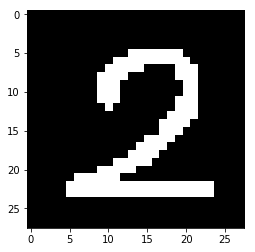

In [154]:
def rescale_segment( segment, size = [28,28] ):
    '''function for resizing (scaling down) images
    input parameters
    seg : the segment of image (np.array)
    size : out size (list of two integers)
    output 
    scaled down image'''
    if len(segment.shape) == 3 : # Non Binary Image
        import cv2
        # thresholding the image
        ret,segment = cv2.threshold(segment,127,255,cv2.THRESH_BINARY)
    m,n = segment.shape
    idx1 = list(range(0,m, (m)//(size[0]) ) )
    idx2 = list(range(0,n, n//(size[1]) )) 
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = segment[ idx1[i] + (m%size[0])//2, idx2[j] + (n%size[0])//2]
    kernel = np.ones( [2,2])
    return out

def extract_segments(img, pad=30, reshape = 0,size = [28,28]) :
    '''function to extract individual chacters and digits from an image
    input paramterts
    img : input image (numpy array)
    pad : padding window size around segments (int)
    size : out size (list of two integers)
    reshape : if 1 , output will be scaled down. if 0, no scaling down
    Returns
    out : list of each segments (starting from leftmost digit)'''
    
    import cv2
    # thresholding the image
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    # Negative tranform gray levels (background becomes black) 
    thresh1 = thresh1 - 1
    thresh1[thresh1 == 254] = 0
    thresh1[thresh1 == - 1 ] = 255
    
    # connected component labelling 
    output = cv2.connectedComponentsWithStats(thresh1, 4)
    final = []
    temp1 = np.sort( output[2][:,0] )
    kernel = np.ones( [3,3])
    for i in range(1,output[0]):
        temp2 = output[2]
        cord = np.squeeze( temp2[temp2[:,0] == temp1[i]] )
        num = np.pad( thresh1[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')
        num = cv2.dilate(num,kernel,iterations = 1)
        if reshape == 1:
            num = rescale_segment( num, size )
        final.append(num)
        
    return final

# reading the image,  0 would convert to gray image
img = cv2.imread('/Users/josejoy/Desktop/ECE 271B Stat Learning /project/eq1.jpg',0)
segments= extract_segments(img, 30, reshape = 1, size = [28,28] )
plt.imshow(segments[0],cmap = 'gray')
plt.show()


## Morphological operations

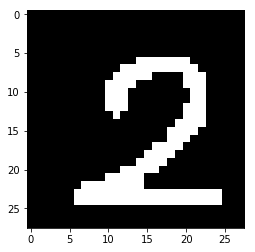

In [22]:
kernel = np.ones( [2,2])
opening = cv2.morphologyEx(segments[0], cv2.MORPH_CLOSE, kernel )
# dilation = cv2.dilate(resam,kernel,iterations = 1)
plt.imshow(opening,cmap = 'gray')
plt.show()  

## HASy dataset manipulation

| Symbols | symbol_id |
|:---------|-----------|:-
| pi| 81|
| < | 187|
|>|188|
|-|195|
|+|196|
|%|267|
| division | 526 |
| multiply | 513 |



In [115]:
path1 = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/HASYv2/'
symbols = pd.read_csv(path1+'symbols.csv')
path2 = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/HASYv2/classification-task/fold-1/'
train1 = pd.read_csv(path2+'train.csv')
train1.head()

,path,symbol_id,latex,user_id
0,../../hasy-data/v2-00016.png,31,A,8071
1,../../hasy-data/v2-00017.png,31,A,9505
2,../../hasy-data/v2-00018.png,31,A,16925
3,../../hasy-data/v2-00019.png,31,A,16925
4,../../hasy-data/v2-00020.png,31,A,16925


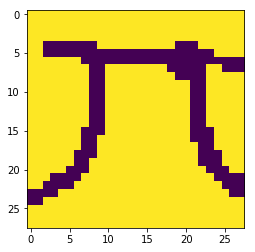

In [153]:
fname1 = train1['path'][1]
path3 = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/HASYv2/hasy-data/'
temp = train1[train1['symbol_id']== 81 ]
name1 = temp.iloc[11]['path']
def get_Hasy_filename(name):
    '''function to extract filenames for reading images from HASy dataset
    Input : name, string of file path
    Output : only file name'''
    for i in range(1,len(name)):
        if name[-i] == 'v':
            return name[-i:]
        
img1 = cv2.imread(path3 + get_Hasy_filename(name1),0)
img1 = rescale_segment( img1 )
# img1 = PIL.Image.open(path3 + 'v2-25562.png')
plt.imshow(img1)
plt.show()